In [ ]:
from IPython.display import display, HTML

# HTML para la portada
html_code = """
<div style="
    background-color: #f4f4f4;
    border-radius: 15px;
    padding: 30px;
    text-align: center;
    font-family: Arial, sans-serif;
    color: #333;
    box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #4CAF50; font-size: 50px;">Microproyecto 2 - Heart Disease</h1>
    <h2 style="color: #555;">Equipo 9</h2>
    <hr style="border: none; height: 2px; background-color: #4CAF50; margin: 20px auto; width: 50%;">
    <h3 style="color: #222; margin: 10px 0;">Estudiantes:</h3>
    <ul style="list-style: none; padding: 0; font-size: 20px;">
        <li>Luis Alejandro Varela Ojeda</li>
        <li>Juan Manuel Rodríguez Sánchez</li>
        <li>Jacobo Ochoa Ramírez</li>
    </ul>
</div>
"""

# Mostrar la portada
display(HTML(html_code))


In [ ]:
#Importar librerías
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go

##Cargar Datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Función para cargar datos
def loadData(inputFile):
    df = pd.read_csv(inputFile)
    return df

In [ ]:
heartDisDF = loadData("/content/heart_disease_patients.csv")

#contexto
-  **id**: Index
-  **age**: Age of patient
-  **sex**: Gender of patient
  0. Mujer.
  1. Hombre.
-  **cp**: chest pain type
  1. Typical angina (chest pain related to reduced blood flow to the heart)
  2. Atypical angina
  3. Non-anginal pain
  4. Asymptomatic (no chest pain)
-  **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
-  **chol**: Serum cholesterol in mg/dl
-  **fbs**: Fasting blood sugar > 120 mg/dl
  0. false
  1. true
-  **restecg**: Resting electrocardiographic results
  0. Normal
  1. Having ST-T wave abnormalities (indicative of possible heart issues)
  2. Showing probable or definite left ventricular hypertrophy.
-  **thalach**: Maximum heart rate achieved
-  **exang**: Exercise induced angina
  0.  no
  1.  yes
-  **oldpeak**: ST depression induced by exercise relative to rest
-  **slope**: The slope of the peak exercise ST segment
  1. Upsloping
  2. Flat (associated with higher risk)
  3. Downsloping (strong indicator of ischemia)



#Análisis Exploratorio de Datos

In [ ]:
print(heartDisDF.shape)
heartDisDF.head()

(303, 12)


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63,1,1,145,233,1,2,150,0,2.3,3
1,2,67,1,4,160,286,0,2,108,1,1.5,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2
3,4,37,1,3,130,250,0,0,187,0,3.5,3
4,5,41,0,2,130,204,0,2,172,0,1.4,1


In [ ]:
heartDisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [ ]:
#exploración de los datos
(heartDisDF == 0).astype(int).sum()

,0
id,0
age,0
sex,97
cp,0
trestbps,0
chol,0
fbs,258
restecg,151
thalach,0
exang,204


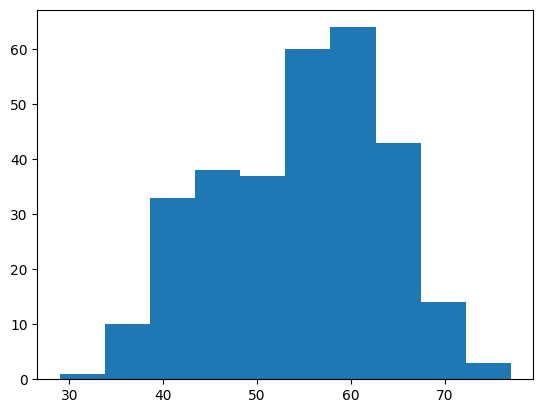

In [ ]:
plt.hist(heartDisDF["age"])
plt.show()

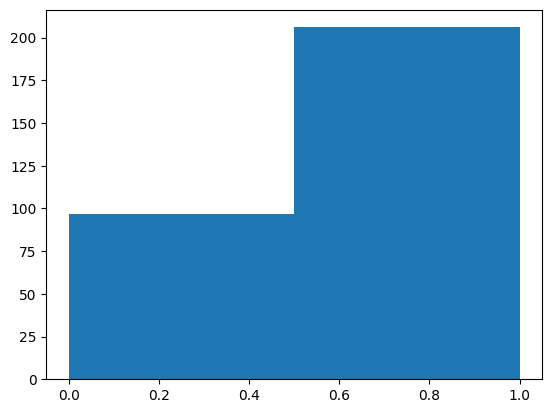

,0
sex,
0,97
1,206


In [ ]:
plt.hist(heartDisDF["sex"], 2)
plt.show()
heartDisDF.groupby("sex").size()

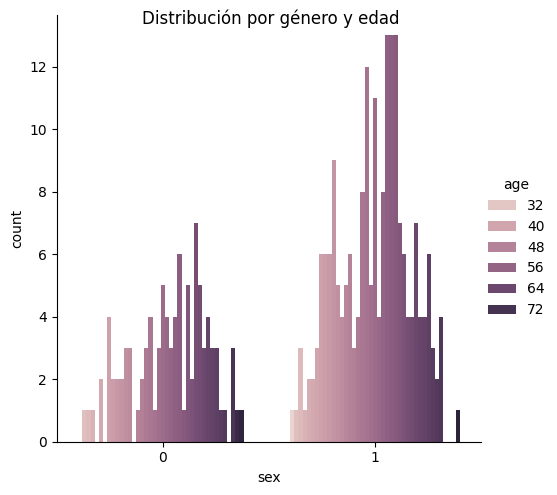

In [ ]:
# Distribución por género y edad


g = sb.catplot(x='sex', data=heartDisDF, hue='age', kind="count")
g.fig.suptitle("Distribución por género y edad")
plt.show()

##Normalización

In [ ]:
ori_heartDisDF = heartDisDF.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Columnas a normalizar
columns_to_normalize = ['age', 'cp', 'trestbps' ,'chol','restecg', 'thalach', 'oldpeak', 'slope']

scaler = MinMaxScaler()

# Aplicar normalización
heartDisDF[columns_to_normalize] = scaler.fit_transform(heartDisDF[columns_to_normalize])

# Ver los datos normalizados
heartDisDF.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,0.708333,1,0.000000,0.481132,0.244292,1,1.0,0.603053,0,0.370968,1.0
1,2,0.791667,1,1.000000,0.622642,0.365297,0,1.0,0.282443,1,0.241935,0.5
2,3,0.791667,1,1.000000,0.245283,0.235160,0,1.0,0.442748,1,0.419355,0.5
3,4,0.166667,1,0.666667,0.339623,0.283105,0,0.0,0.885496,0,0.564516,1.0
4,5,0.250000,0,0.333333,0.339623,0.178082,0,1.0,0.770992,0,0.225806,0.0


In [ ]:
#@title Mezcla de los datos
heartDisDF = heartDisDF.sample(frac=1, random_state=0).reset_index(drop=True)
heartDisDF.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,226,0.104167,0,0.333333,0.226415,0.191781,0,0.0,0.923664,0,0.112903,0.0
1,153,0.791667,0,0.666667,0.198113,1.000000,0,1.0,0.679389,0,0.258065,0.5
2,229,0.520833,1,1.000000,0.150943,0.182648,0,1.0,0.282443,1,0.000000,0.5
3,202,0.729167,0,1.000000,0.811321,0.454338,0,0.0,0.633588,1,0.000000,0.0
4,53,0.312500,1,1.000000,0.169811,0.374429,0,1.0,0.625954,0,0.000000,0.0


In [ ]:
heartDisDF.iloc[:,1:].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.529978,0.679868,0.719472,0.355564,0.275555,0.148515,0.495050,0.600055,0.326733,0.167678,0.300330
std,0.188305,0.467299,0.320042,0.166035,0.118212,0.356198,0.497486,0.174618,0.469794,0.187270,0.308113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.666667,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.666667,0.339623,0.262557,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000
75%,0.666667,1.000000,1.000000,0.433962,0.340183,0.000000,1.000000,0.725191,1.000000,0.258065,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Gráfico de dispersión

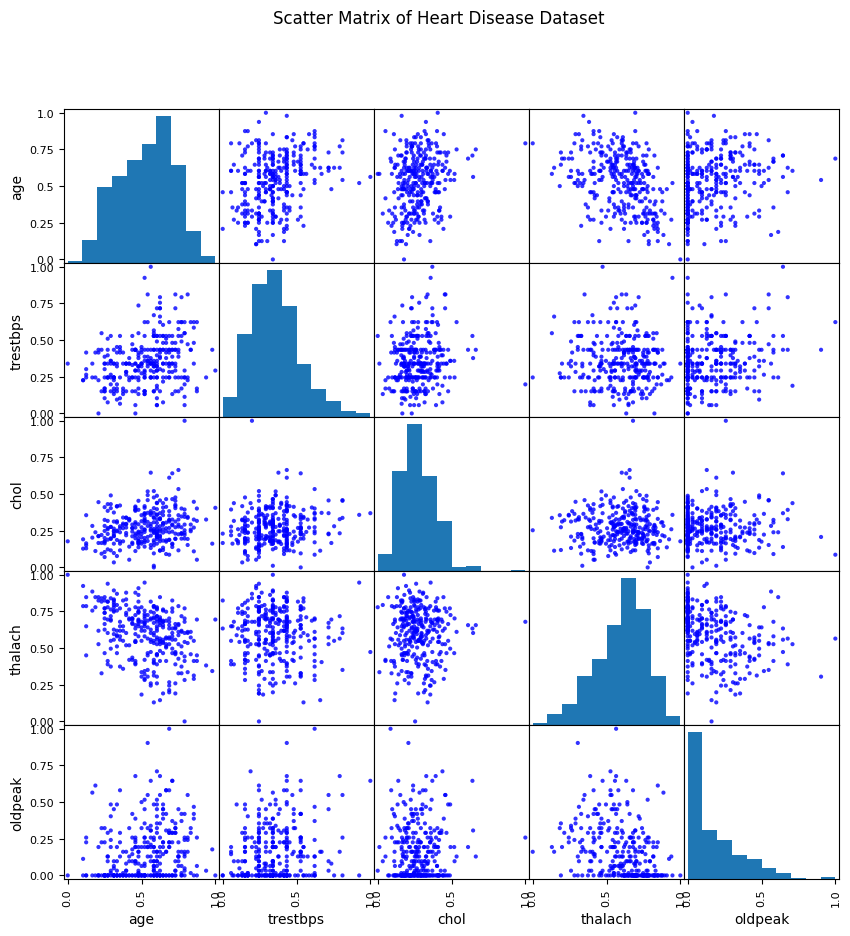

In [ ]:
from sklearn.model_selection import train_test_split
from matplotlib import cm
from pandas.plotting import scatter_matrix

numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scatter_matrix(heartDisDF[numeric_cols], figsize=(10, 10), diagonal='hist', alpha=0.8, color='blue')

plt.suptitle("Scatter Matrix of Heart Disease Dataset")
plt.show()

## Interpretación matriz de dispersión

Mediante un analisis visual de las variables no categoricas se puede notar que:
 - No hay diferenciación en grupos de los datos.
 - La variable oldpeak presenta una alto número de datos en 0, que por falta de información no podemos determinar si estos representan valores nulos. Por este motivo se ha decidido descartar esta variable para la aplicación de los algoritmos de clustering.



##Análisis de Correlaciones

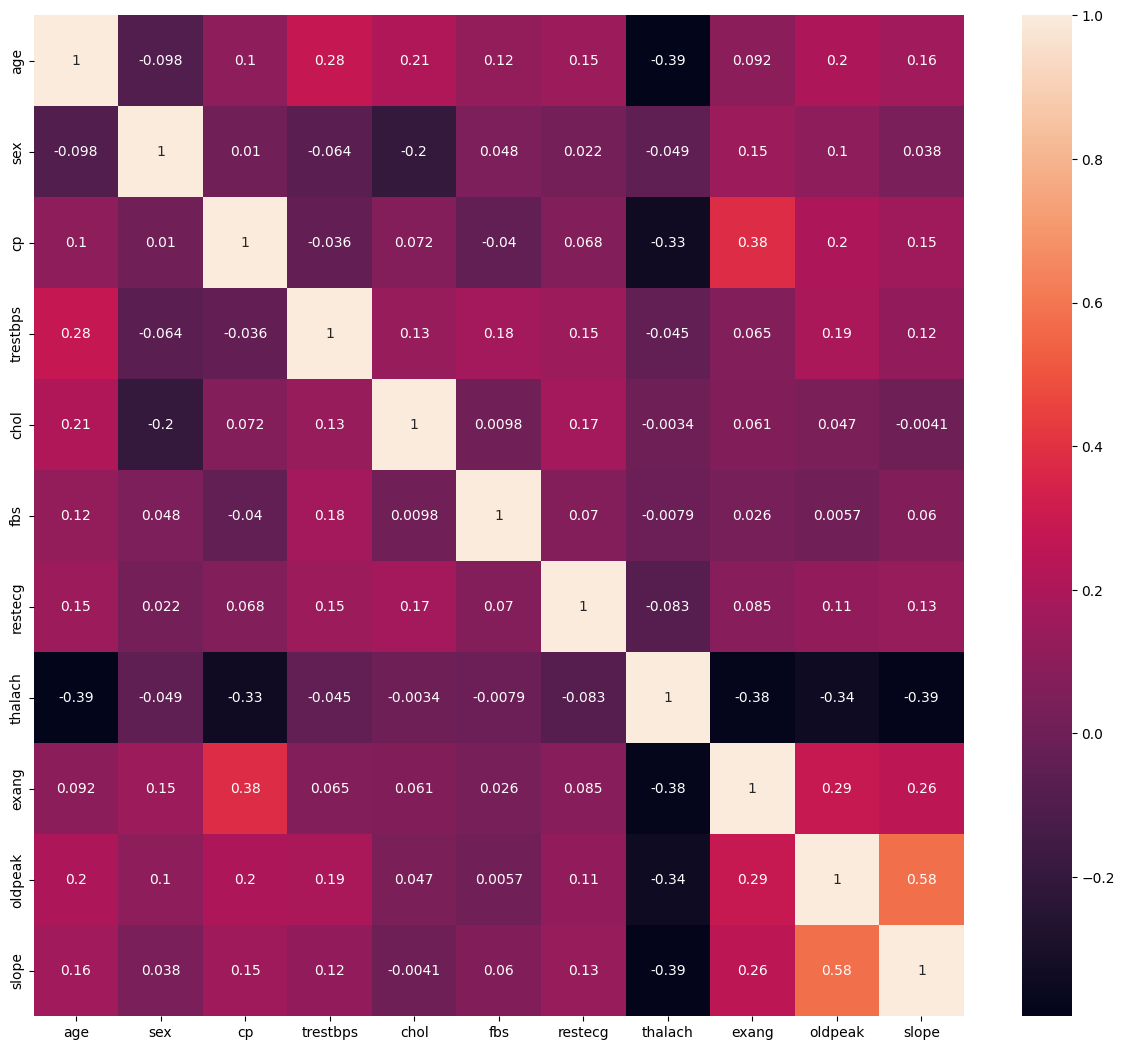

In [ ]:
import seaborn as sb
matrizCorr = heartDisDF.iloc[:,1:].corr()
fig, ax = plt.subplots(figsize=(15, 13))
sb.heatmap(matrizCorr, annot = True, ax = ax)
plt.show()


##Interpretación de los datos

Con base a la matriz de correlación vemos que las variables que más tienen corelación entre sí son "oldpeak" y "slope", lo que indica que la información de ambas variables es redundante.

La variable Thalach demuestra una correlación alta y con pendiente negativa con la mayoría de variables, por lo que también queda descartada.

En pruebas anteriores el uso de variables categóricas generó problemas en la clasificación de los datos. Estas provocaban que los clusters se generaran a modo de filas, lo cual representa un sesgo en el modelo. Por este motivo se descartó el uso de variables categoricas para este caso.

Entre las variables restantes, se seleccionaron las variables "trestbps", "age" y "chol".

#Cantidad optima de clusters

##Variables seleccionadas

In [ ]:
ArraryHeartDisDF = np.array(heartDisDF[[ "trestbps","age","chol"]])
ArraryHeartDisDF[:10]

array([[0.22641509, 0.10416667, 0.19178082],
       [0.19811321, 0.79166667, 1.        ],
       [0.1509434 , 0.52083333, 0.1826484 ],
       [0.81132075, 0.72916667, 0.4543379 ],
       [0.16981132, 0.3125    , 0.37442922],
       [0.24528302, 0.79166667, 0.25342466],
       [0.54716981, 0.58333333, 0.33789954],
       [0.30188679, 0.125     , 0.35616438],
       [0.27358491, 0.5       , 0.35616438],
       [0.41509434, 0.35416667, 0.26712329]])

##curva de codo

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_curve(data, maxClusters=15):
    maxClusters = range(1, maxClusters + 1)  # Definir el rango de clusters
    inertias = []

    # Iterar sobre el rango de clusters y calcular la inercia
    for k in maxClusters:
        kmeanModel = KMeans(n_clusters=k, max_iter=500)
        kmeanModel.fit(data)
        inertias.append(kmeanModel.inertia_)

    # Mostrar los valores obtenidos
    print("Inercia para cada k:", inertias)

    # Graficar la curva del codo
    plt.figure(figsize=(10, 8))
    plt.plot(maxClusters, inertias, 'bx-', label="Inertia")
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Inercia')
    plt.title('Método del codo para determinar k óptimo')
    plt.grid(True)
    plt.legend()
    plt.show()


In [ ]:
#Valores de curva de codo de una corrida anterior
#30.508230375227313, 19.175216175455546, 14.483441551360091, 11.670949706530768, 10.245049503315428, 9.394085344566047

Inercia para cada k: [23.254241205921552, 14.571622235646569, 11.154844383133584, 9.603107272603625, 8.615988128444062, 7.640014606215919, 7.070856653617218, 6.118767040721884, 5.659643252219774, 5.292530720173411]


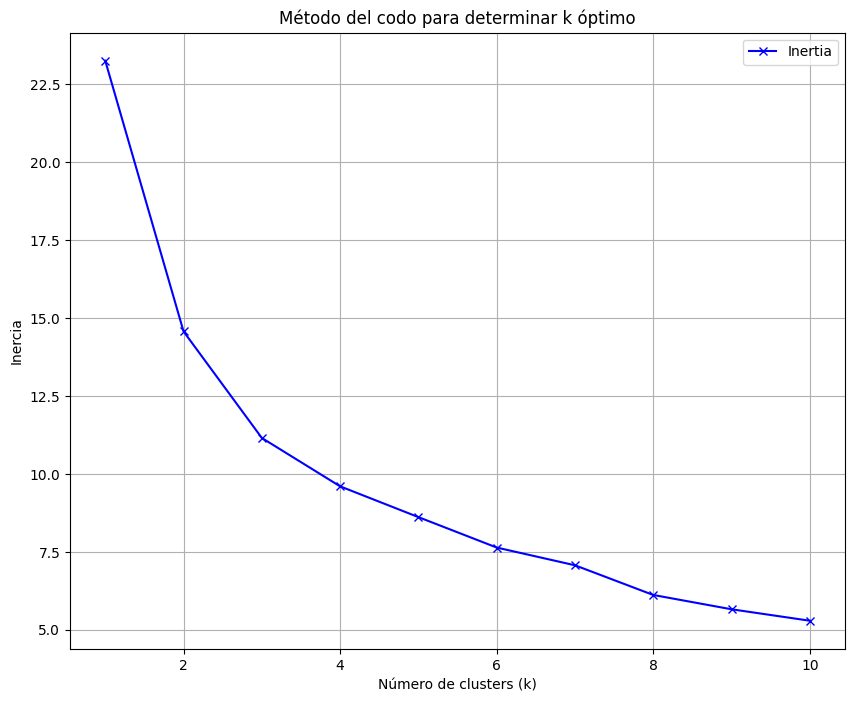

In [ ]:
elbow_curve( ArraryHeartDisDF, maxClusters=10)

### Análisis de Metodo del codo

Se puede notar que la forma del codo se empieza a aplanar para k = 3 y k = 4, ya que no hay una mejoria significativa en la reducción de la variación intracluster (inercia). Por lo tanto, este método sugiere que la cantidad optima de clusters 3 o 4.

##Estadistico de Gap

In [ ]:
# nrefs es la cantidad de datos ("datasets") de referencia contra los que se va a comparar
def optimalK(data, nrefs=3, maxClusters=15):

    gaps = np.zeros((len(range(1, maxClusters+1)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters+1)):

        # guardara los resultados de dispersión de cada distribución simulada
        refDisps = np.zeros(nrefs)

        # Genera las muestras aleatorias indicadas con nrefs y ejecuta k-means
        # en cada bucle obteniendo los resultados de dispersión (inercia)
        # para cada conjunto generado.
        for i in range(nrefs):

            # Crea nuevo conjunto aleatorio de referencia
            # Se puede usar una semilla para tener reproducibilidad
            np.random.seed(0)
            randomReference = np.random.random_sample(size=data.shape)

            # se ajusta el modelo al conjunto de referencia
            km = KMeans(k)
            km.fit(randomReference)
            # se guarda la dispersión obtenida
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Se ajusta el modelo a los datos originales y se guarda su inercia
        km = KMeans(k)
        km.fit(data)

        origDisp = km.inertia_

        # Calcula el estadístico de gap para k clusters usando el promedio de
        # las dispersiones de los datos simulados y la dispersión de los datos originales.
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Guarda el estadístico de gap obtenido en este bucle.
        gaps[gap_index] = gap

        resultsdf.loc[gap_index] = [ k, gap]

    # Selecciona el "primer máximo" de los estadísticos obtenidos y devuelve
    # su respectivo número de clusters
    for i in range(0, len(gaps)-1):
      if gaps[i+1] <= gaps[i]:
        return (i+1, resultsdf)
    return (len(gaps), resultsdf)
    #return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

3


Text(0.5, 1.0, 'Gap Statistic vs. K')

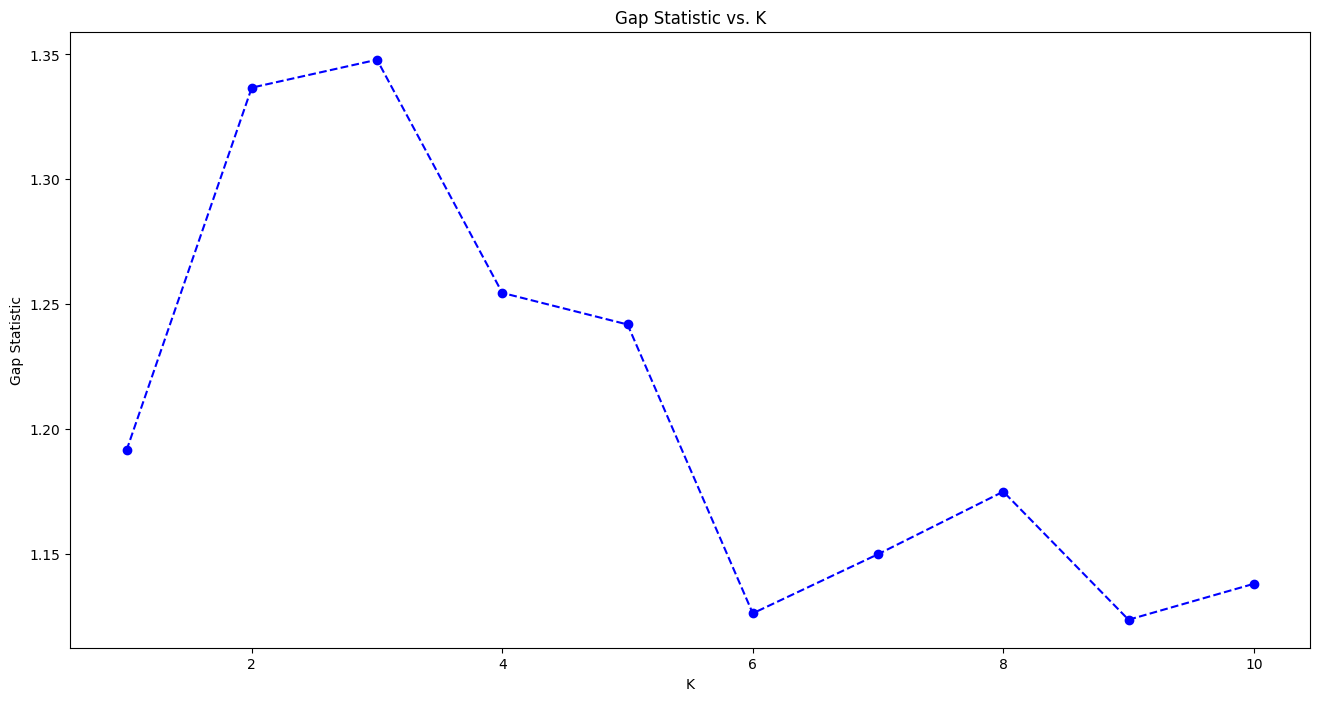

In [ ]:
k , gapdf = optimalK(ArraryHeartDisDF, nrefs = 5, maxClusters=10)

print(k)

plt.figure(figsize=(16,8))
plt.plot(gapdf['clusterCount'], gapdf['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')

### Análisis de Estadístico de Gap

En la gráfica es muy evidente que para k = 3 el valor del estadístico de Gap (que hasta ahora iba creciendo de forma constante) cae abruptamente en k = 4. Esto indica que la cantidad optima de clusters es 3.

##Análisis silueta

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def silueta(data):
  range_n_clusters = [2, 3, 4, 5, 6]
  X = data

  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(19, 4)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = KMeans(n_clusters=n_clusters, random_state=10)
      cluster_labels = clusterer.fit_predict(X)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(X, cluster_labels)
      print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = plt.cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                  c=colors, edgecolor='k')

      # Labeling the clusters
      centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                  c="white", alpha=1, s=200, edgecolor='k')

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                      s=50, edgecolor='k')

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

  plt.show()

For n_clusters = 2 The average silhouette_score is : 0.31987955214776026
For n_clusters = 3 The average silhouette_score is : 0.29149511533858313
For n_clusters = 4 The average silhouette_score is : 0.25021807495628823
For n_clusters = 5 The average silhouette_score is : 0.23366015979861587
For n_clusters = 6 The average silhouette_score is : 0.24481962574318597


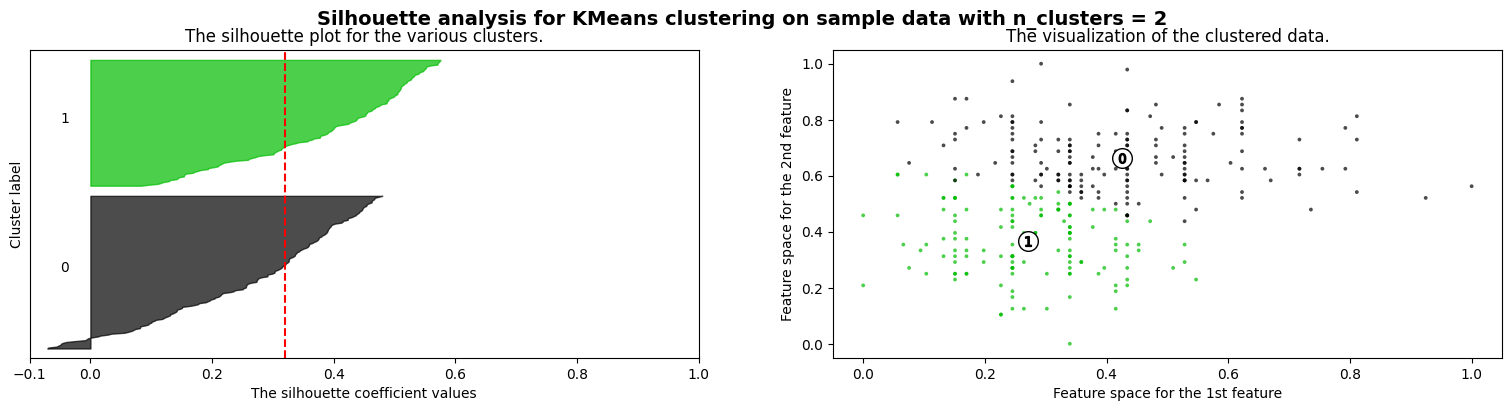

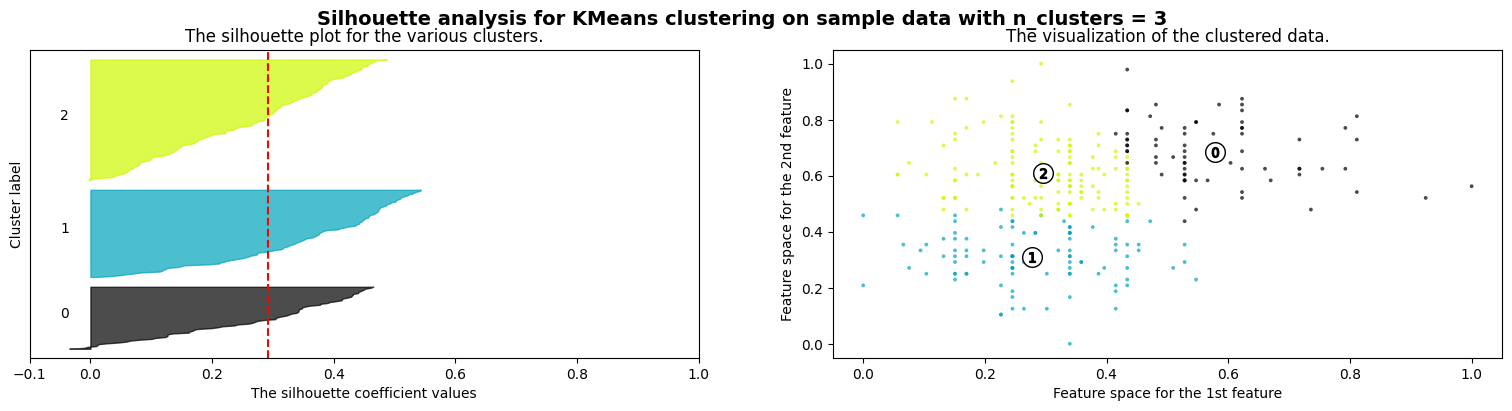

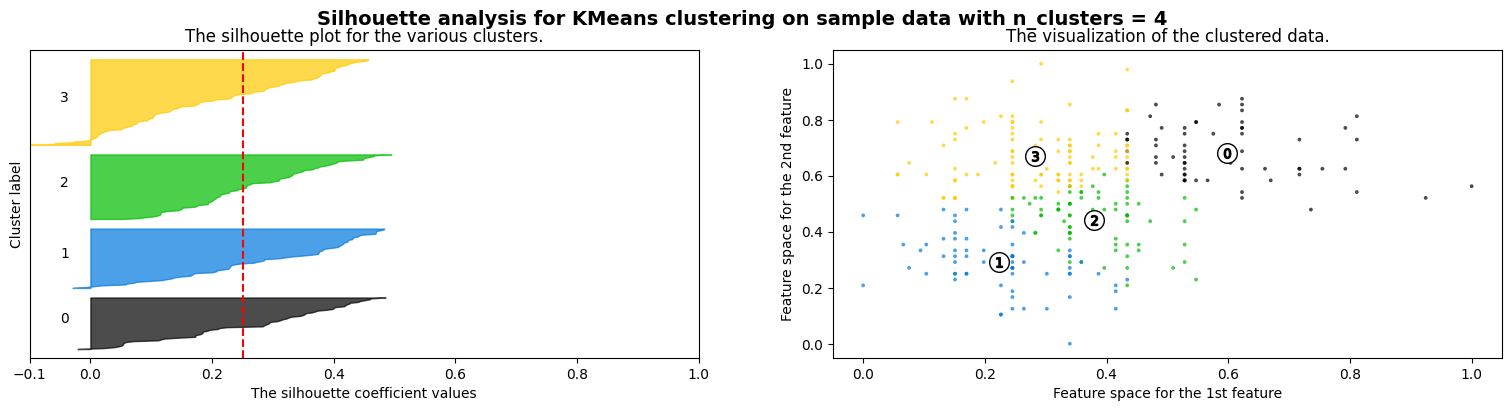

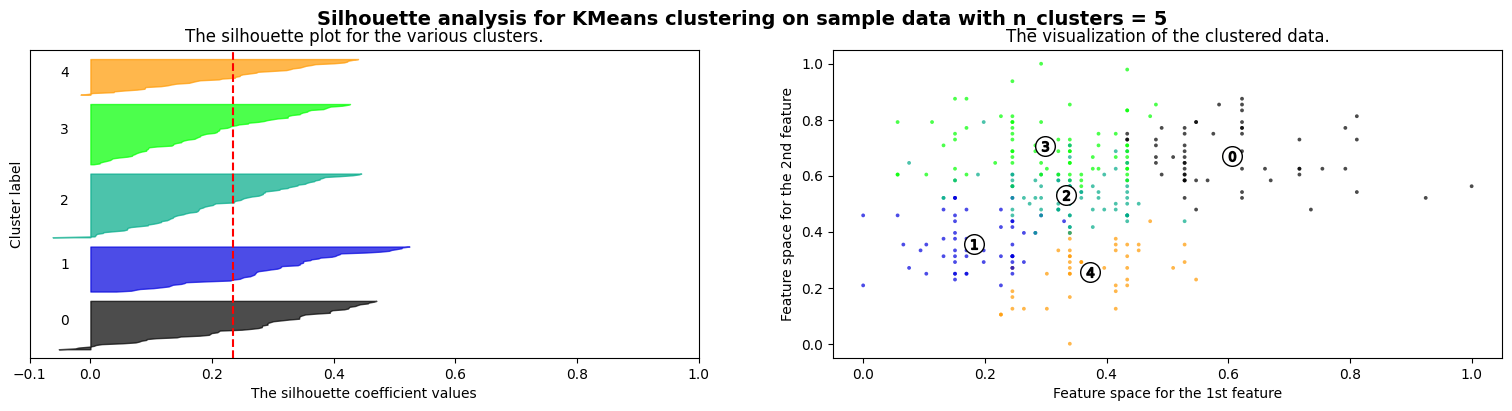

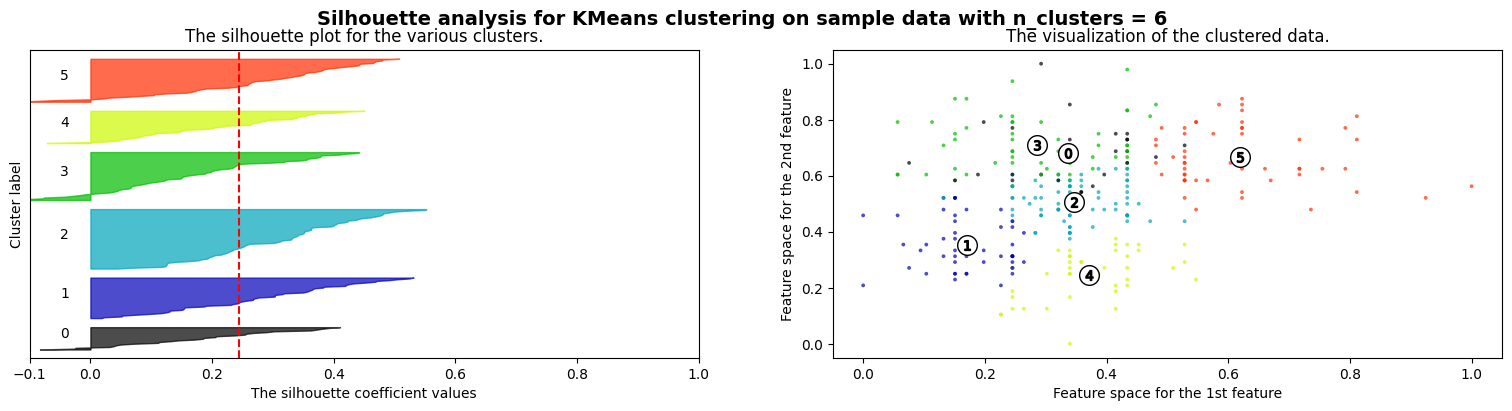

In [ ]:
silueta(ArraryHeartDisDF)

### Análisis de Coeficiente Silueta

Podemos ver que los puntajes más altos que se obtuvieron fueron para 2 y 3 clusters, pero se observa que están repartidos de forma más equilibrada para k = 3. Ya que para cada cluster el ancho es muy similar y que son casi uniformes. También se debe destacar que para k = 3 se tiene  una menor cantidad de datos mal clasificados, solo ocurrió en uno de los clusters.

#Utilización del modelo


##Datos normalizados

In [ ]:
# Ajustar el modelo KMeans
kmeans_model_3D = KMeans(n_clusters=3, max_iter=1000).fit(heartDisDF[[ "trestbps","age","chol"]])
labels = kmeans_model_3D.labels_
heartDisDF['labels'] = labels
centroids_3D = kmeans_model_3D.cluster_centers_
heartDisDF

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,labels
0,226,0.104167,0,0.333333,0.226415,0.191781,0,0.0,0.923664,0,0.112903,0.0,0
1,153,0.791667,0,0.666667,0.198113,1.000000,0,1.0,0.679389,0,0.258065,0.5,2
2,229,0.520833,1,1.000000,0.150943,0.182648,0,1.0,0.282443,1,0.000000,0.5,2
3,202,0.729167,0,1.000000,0.811321,0.454338,0,0.0,0.633588,1,0.000000,0.0,1
4,53,0.312500,1,1.000000,0.169811,0.374429,0,1.0,0.625954,0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,252,0.604167,1,1.000000,0.490566,0.210046,0,0.0,0.259542,0,0.322581,0.5,1
299,193,0.291667,1,1.000000,0.358491,0.276256,1,1.0,0.549618,1,0.016129,0.5,0
300,118,0.125000,0,1.000000,0.415094,0.130137,0,0.0,0.847328,0,0.225806,0.0,0
301,48,0.437500,1,1.000000,0.528302,0.267123,0,1.0,0.435115,0,0.419355,0.5,1


In [ ]:
# Crear la visualización 3D con Plotly
fig = px.scatter_3d(heartDisDF, x="trestbps", y="age", z="chol",
                    color="labels" ,opacity=1).update_traces(marker=dict(opacity=0.3))

# Agregar los centroides al gráfico
for centroid in centroids_3D:
    fig.add_trace(px.scatter_3d(x=[centroid[0]], y=[centroid[1]], z=[centroid[2]]).update_traces(marker=dict(size=7, color='red')).data[0])

fig.show()

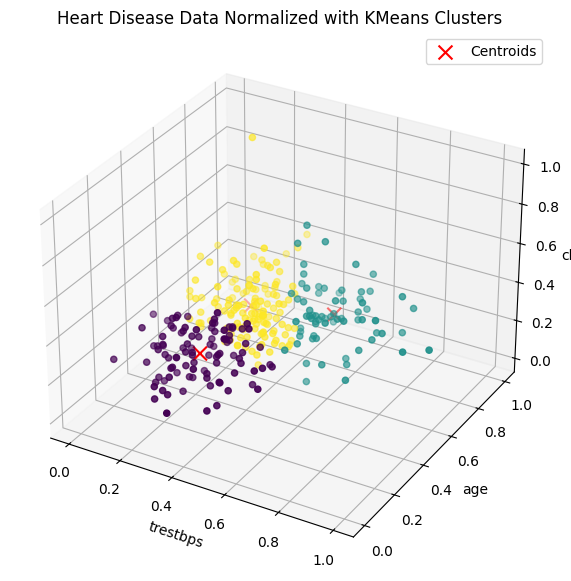

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points colored by cluster labels
scatter = ax.scatter(heartDisDF.iloc[:, 4], heartDisDF.iloc[:, 1], heartDisDF.iloc[:, 5], c=labels, cmap='viridis', marker='o')

# Mark the centroids
ax.scatter(centroids_3D[:, 0], centroids_3D[:, 1], centroids_3D[:, 2], c='red', marker='x', s=100, label='Centroids')

# Set labels
ax.set_xlabel("trestbps")
ax.set_ylabel('age')
ax.set_zlabel('chol')
ax.set_title('Heart Disease Data Normalized with KMeans Clusters')

# Add legend
ax.legend()
# Show plot
plt.show()

##Datos sin normalizar

In [ ]:
# Ajustar el modelo KMeans (datos sin normalizar)
kmeans_model_3D_ori = KMeans(n_clusters=3, max_iter=1000).fit(ori_heartDisDF[[ "trestbps","age","chol"]])
labels_ori = kmeans_model_3D_ori.labels_
ori_heartDisDF['labels_ori'] = labels_ori
centroids_3D_ori = kmeans_model_3D_ori.cluster_centers_
ori_heartDisDF

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,labels_ori
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,0
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0
299,300,68,1,4,144,193,1,0,141,0,3.4,2,2
300,301,57,1,4,130,131,0,0,115,1,1.2,2,2
301,302,57,0,2,130,236,0,2,174,0,0.0,2,0


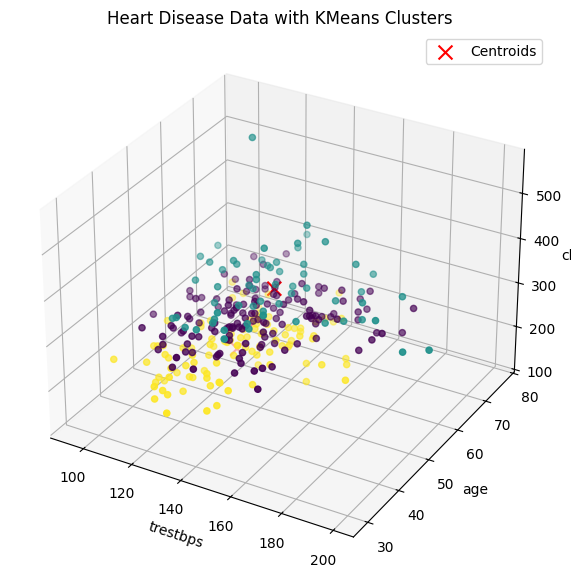

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points colored by cluster labels
scatter = ax.scatter(ori_heartDisDF.iloc[:, 4], ori_heartDisDF.iloc[:, 1], ori_heartDisDF.iloc[:, 5], c=labels_ori, cmap='viridis', marker='o')

# Mark the centroids
ax.scatter(centroids_3D_ori[:, 0], centroids_3D_ori[:, 1], centroids_3D_ori[:, 2], c='red', marker='x', s=100, label='Centroids')

# Set labels
ax.set_xlabel('trestbps')
ax.set_ylabel('age')
ax.set_zlabel('chol')
ax.set_title('Heart Disease Data with KMeans Clusters')

# Add legend
ax.legend()
'', '', ''
# Show plot
plt.show()

In [ ]:
# Crear la visualización 3D con Plotly
fig = px.scatter_3d(ori_heartDisDF, x="trestbps", y="age", z="chol",
                    color="labels_ori" ,opacity=1).update_traces(marker=dict(opacity=0.3))

# Agregar los centroides al gráfico
for centroid in centroids_3D_ori:
    fig.add_trace(px.scatter_3d(x=[centroid[0]], y=[centroid[1]], z=[centroid[2]]).update_traces(marker=dict(size=7, color='red')).data[0])

fig.show()

#Agrupamiento jerárquico de los datos

In [ ]:
heartDisDF_features = heartDisDF[["trestbps", "age", "chol"]]
heartDisDF_features.head()


,trestbps,age,chol
0,0.226415,0.104167,0.191781
1,0.198113,0.791667,1.000000
2,0.150943,0.520833,0.182648
3,0.811321,0.729167,0.454338
4,0.169811,0.312500,0.374429


##Dendograma

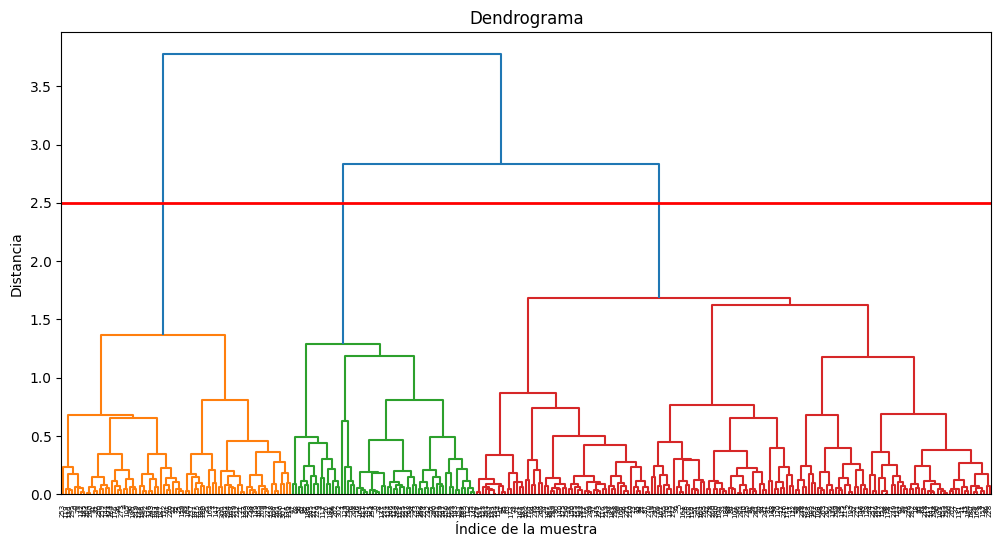

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X_hierarchical = heartDisDF_features.copy()

plt.figure(figsize=(12, 6))
linkage_matrix = linkage(X_hierarchical, method='ward')
dendrogram(linkage_matrix)
plt.axhline(y=2.5, color='red', linestyle='-', linewidth=2)
plt.title('Dendrograma')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
plt.show()


Se puede apreciar que entre 2 y 3 clusters la distancia extra clusters es alta, siendo la de 3 la máxima, apartir de 4 cluster la distancia no es significativa.

##Resultado agrupamiento jerárquico

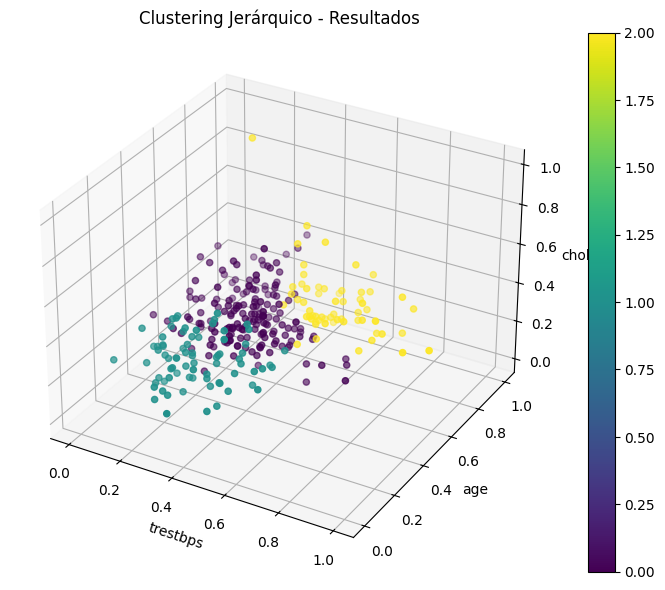

In [ ]:
# Aplicar clustering jerárquico con 3 clusters
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = clustering.fit_predict(X_hierarchical)

# Visualización 3D de los resultados
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(heartDisDF["trestbps"],
                     heartDisDF["age"],
                     heartDisDF["chol"],
                     c = cluster_labels,
                     )

ax.set_xlabel('trestbps')
ax.set_ylabel('age')
ax.set_zlabel('chol')
plt.title('Clustering Jerárquico - Resultados')
plt.colorbar(scatter)
plt.show()

In [ ]:
labels_DF = pd.DataFrame(cluster_labels)


fig = px.scatter_3d(heartDisDF, x="trestbps", y="age", z="chol",
                    color="labels" ,opacity=1).update_traces(marker=dict(opacity=0.3))
fig.show()

#Caracteristicas más representativas de los clusters

In [ ]:
#Etiquetas de cada dato
heartDis_labels = kmeans_model_3D.labels_

print(heartDis_labels)

[0 2 2 1 0 2 1 0 2 0 2 2 2 2 1 2 1 2 0 2 2 0 0 2 2 0 1 2 2 2 2 0 0 2 2 0 0
 2 2 2 2 0 2 2 0 0 2 1 2 2 2 2 0 2 1 1 1 0 2 2 2 0 1 2 1 2 1 2 1 2 2 0 0 0
 2 1 1 2 1 0 2 2 1 0 2 2 2 1 2 0 0 2 2 1 2 2 0 2 2 2 2 2 1 0 0 0 0 0 2 2 2
 1 1 2 1 2 2 1 1 0 2 2 2 2 1 1 0 1 0 1 0 2 0 0 2 2 0 1 0 2 2 0 1 1 0 2 0 0
 2 0 2 1 2 2 0 0 1 2 0 0 2 2 0 0 1 0 2 2 2 0 1 2 0 2 0 2 0 2 2 2 2 1 1 1 2
 0 1 0 2 0 0 2 2 0 2 2 0 0 0 1 2 2 2 1 0 2 0 2 1 0 2 1 0 2 2 0 2 0 0 0 0 0
 0 2 1 1 1 1 2 1 1 2 1 1 2 2 1 0 2 2 2 2 0 0 0 1 1 1 0 2 0 1 2 0 1 2 1 2 0
 0 0 0 1 2 0 2 1 2 1 2 1 2 2 0 1 2 0 0 2 0 0 2 0 2 2 1 2 1 2 2 1 2 0 0 0 0
 2 2 1 0 0 1 1]


In [ ]:
#coordenada de los centroides
centroides_heartDis = kmeans_model_3D.cluster_centers_
print(centroides_heartDis)

[[0.27820562 0.30803571 0.23956295]
 [0.57830189 0.68392857 0.30153294]
 [0.29622642 0.61126543 0.28821241]]


## Resumen de caracteristícas con datos no normalizados




In [ ]:
ori_labeled_heartDisDF = ori_heartDisDF.copy()
#Se realiza una mezcla de los datos con la misma semilla con la que se aleatorizó el conjunto de datos para garantizar que los labels
#se asignen al dato adecuado
ori_labeled_heartDisDF = ori_labeled_heartDisDF.sample(frac=1, random_state=0).reset_index(drop=True)
ori_labeled_heartDisDF.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,labels_ori
0,226,34,0,2,118,210,0,0,192,0,0.7,1,2
1,153,67,0,3,115,564,0,2,160,0,1.6,2,1
2,229,54,1,4,110,206,0,2,108,1,0.0,2,2
3,202,64,0,4,180,325,0,0,154,1,0.0,1,1
4,53,44,1,4,112,290,0,2,153,0,0.0,1,1


In [ ]:
ori_labeled_heartDisDF['labels'] = labels
ori_labeled_heartDisDF.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,labels_ori,labels
0,226,34,0,2,118,210,0,0,192,0,0.7,1,2,0
1,153,67,0,3,115,564,0,2,160,0,1.6,2,1,2
2,229,54,1,4,110,206,0,2,108,1,0.0,2,2,2
3,202,64,0,4,180,325,0,0,154,1,0.0,1,1,1
4,53,44,1,4,112,290,0,2,153,0,0.0,1,1,0


In [ ]:
#cuenta la cantidad de datos de una categoría en cada columna.
def distDatosVarCategoricas(df, lista_categoricas):
  cat_counts = []
  for categorica in lista_categoricas:
    cat_counts.append(df[categorica].value_counts())

  return cat_counts

In [ ]:
def formatCuentasCategoricas(cuentas): #ponerlo bonito
  for cuenta in cuentas:
    print(cuenta.to_string(), end = "\n\n")

In [ ]:
cluster_0 =ori_labeled_heartDisDF[ori_labeled_heartDisDF['labels'] == 0]
cluster_0.drop('labels', axis=1)[numeric_cols].describe()

,age,trestbps,chol,thalach,oldpeak
count,98.000000,98.000000,98.000000,98.000000,98.000000
mean,43.785714,123.489796,230.928571,160.306122,0.652041
std,4.525415,12.794365,42.199147,20.051690,0.936128
min,29.000000,94.000000,141.000000,114.000000,0.000000
25%,41.000000,112.750000,200.750000,147.250000,0.000000
50%,44.000000,121.000000,228.000000,163.000000,0.050000
75%,47.000000,130.000000,255.750000,175.000000,1.175000
max,52.000000,152.000000,341.000000,202.000000,3.800000


In [ ]:
categoricas = ["sex", "cp", "fbs", "restecg", "exang", "slope"]
cuentas_categoricas1 = distDatosVarCategoricas(cluster_0, categoricas)
formatCuentasCategoricas(cuentas_categoricas1)

sex
1    71
0    27

cp
4    34
3    34
2    23
1     7

fbs
0    92
1     6

restecg
0    60
2    38

exang
0    74
1    24

slope
1    57
2    36
3     5



In [ ]:
cluster_1 =ori_labeled_heartDisDF[ori_labeled_heartDisDF['labels'] == 1]
cluster_1.drop('labels', axis=1)[numeric_cols].describe()

,age,trestbps,chol,thalach,oldpeak
count,70.000000,70.000000,70.000000,70.000000,70.000000
mean,61.828571,155.300000,258.071429,145.200000,1.422857
std,5.219727,13.375676,55.298484,21.843714,1.336464
min,50.000000,138.000000,126.000000,88.000000,0.000000
25%,58.000000,145.250000,225.250000,132.250000,0.250000
50%,62.000000,150.000000,256.000000,149.000000,1.000000
75%,65.750000,160.000000,287.500000,160.750000,2.225000
max,76.000000,200.000000,417.000000,195.000000,6.200000


In [ ]:
cuentas_categoricas2 = distDatosVarCategoricas(cluster_1, categoricas)
formatCuentasCategoricas(cuentas_categoricas2)

sex
1    41
0    29

cp
4    33
3    19
1    12
2     6

fbs
0    53
1    17

restecg
2    41
0    27
1     2

exang
0    49
1    21

slope
2    35
1    27
3     8



In [ ]:
cluster_2 =ori_labeled_heartDisDF[ori_labeled_heartDisDF['labels'] == 2]
cluster_2.drop('labels', axis=1)[numeric_cols].describe()

,age,trestbps,chol,thalach,oldpeak
count,135.000000,135.000000,135.000000,135.000000,135.000000
mean,58.340741,125.400000,252.237037,144.125926,1.122222
std,5.329673,10.355761,53.832134,22.768933,1.136088
min,51.000000,100.000000,131.000000,71.000000,0.000000
25%,54.000000,120.000000,215.000000,130.000000,0.000000
50%,58.000000,128.000000,246.000000,147.000000,1.000000
75%,62.000000,132.000000,282.500000,161.500000,1.800000
max,77.000000,142.000000,564.000000,186.000000,5.600000


In [ ]:
cuentas_categoricas3 = distDatosVarCategoricas(cluster_2, categoricas)
formatCuentasCategoricas(cuentas_categoricas3)

sex
1    94
0    41

cp
4    77
3    33
2    21
1     4

fbs
0    113
1     22

restecg
2    69
0    64
1     2

exang
0    81
1    54

slope
2    69
1    58
3     8



In [ ]:
#Cluster_1 filtrado por sexo femenino debido a la alta cantidad de estas en este cluster
cluster_1_woman = ori_labeled_heartDisDF[(ori_labeled_heartDisDF['labels'] == 1) & (ori_labeled_heartDisDF['sex'] == 0)]
cluster_1_woman.drop('labels', axis=1)[numeric_cols].describe()

,age,trestbps,chol,thalach,oldpeak
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,62.896552,155.448276,276.241379,149.551724,1.468966
std,4.723383,15.157710,63.498962,17.309341,1.564358
min,54.000000,140.000000,164.000000,114.000000,0.000000
25%,60.000000,145.000000,228.000000,145.000000,0.200000
50%,63.000000,150.000000,269.000000,154.000000,1.000000
75%,65.000000,160.000000,307.000000,161.000000,2.600000
max,76.000000,200.000000,417.000000,179.000000,6.200000


In [ ]:
def plot_grouped_histograms(data_lists, titles=None, labels=None):

    # Align indices across all Series in the same category group
    aligned_data_lists = []
    for group in data_lists:
        # Start with the first index and iteratively union the rest
        common_index = group[0].index
        for s in group[1:]:
            common_index = common_index.union(s.index)  # Combine all unique indices

        aligned_group = [s.reindex(common_index, fill_value=0) for s in group]  # Align each Series
        aligned_data_lists.append(aligned_group)

    num_groups = len(aligned_data_lists)
    titles = titles if titles else [f"Plot {i+1}" for i in range(num_groups)]
    labels = labels if labels else [f"Data {i+1}" for i in range(len(aligned_data_lists[0]))]

    # Create subplots
    fig, axes = plt.subplots(1, num_groups, figsize=(5 * num_groups, 5), constrained_layout=True)
    if num_groups == 1:
        axes = [axes]  # Ensure axes is iterable for a single plot

    # Plot each grouped bar plot
    for i, (group, title) in enumerate(zip(aligned_data_lists, titles)):
        categories = group[0].index  # Get the categories from the first Series
        x = np.arange(len(categories))  # X positions for categories
        width = 0.8 / len(group)  # Bar width to fit all bars

        for j, series in enumerate(group):
            axes[i].bar(x + j * width, series.values, width, label=labels[j])

        axes[i].set_title(title)
        axes[i].set_xticks(x + width * (len(group) - 1) / 2)
        axes[i].set_xticklabels(categories)
        axes[i].set_xlabel("Category")
        axes[i].set_ylabel("Count")
        axes[i].legend()
        axes[i].grid(axis="y", linestyle="--", alpha=0.7)

    # Show the plot
    plt.show()

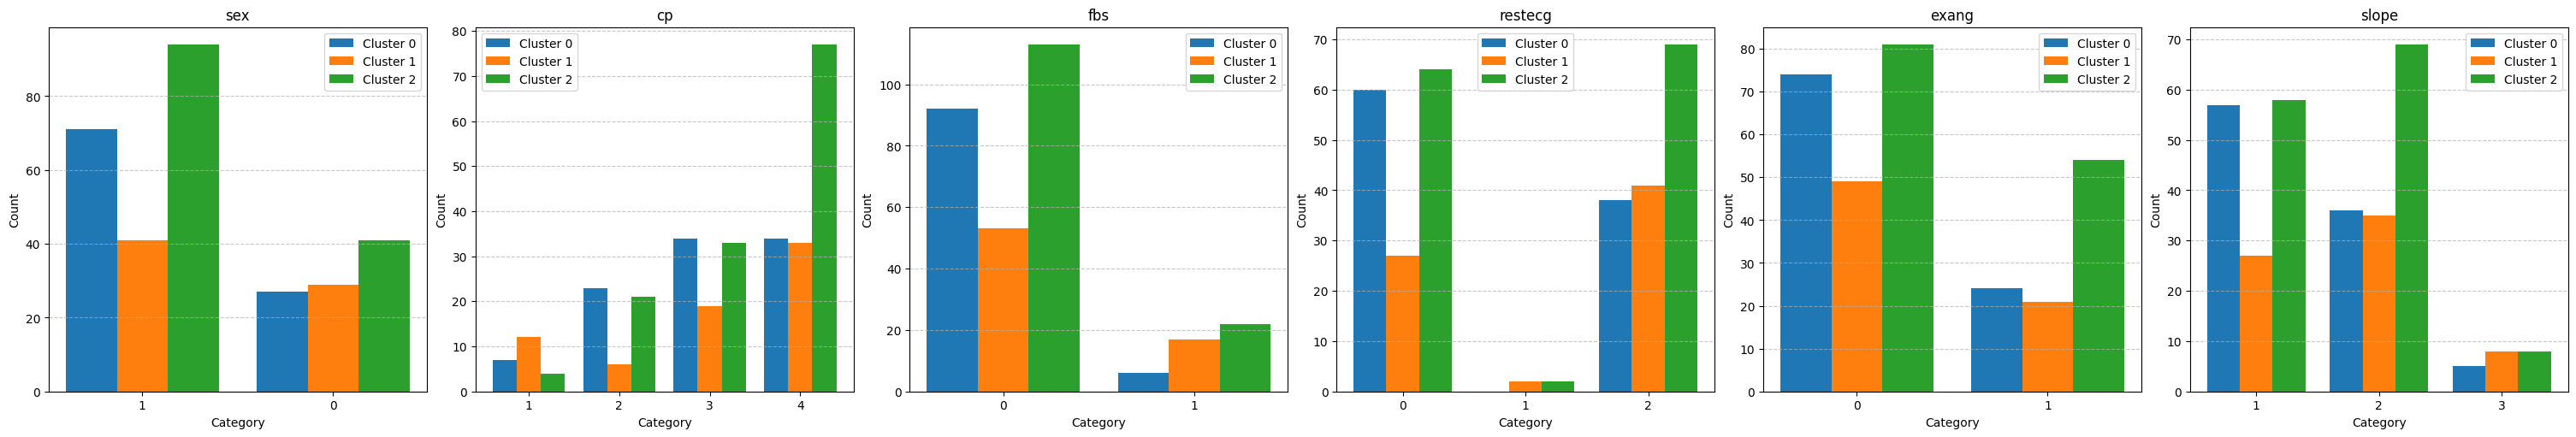

In [ ]:
data_lists = list(zip(cuentas_categoricas1, cuentas_categoricas2, cuentas_categoricas3))

plot_grouped_histograms(
    data_lists=data_lists,
    labels=["Cluster 0", "Cluster 1", "Cluster 2"],
    titles=categoricas
)


## Análisis de características

En promedio, las observaciones del **cluster_0** tienen las siguientes carácteristicas que los representan:

 - age:  43.8
 - trestbps: 123.5
 - chol: 231
 - thalach: 160.3
 - oldpeak: 0.65


En promedio, las observaciones del **cluster_1** tienen las siguientes carácteristicas que los representan:

 - age:      61.83
 - trestbps: 155.30
 - chol:     258.07
 - thalach:  145.20
 - oldpeak:  1.42

En promedio, las observaciones del **cluster_2** tienen las siguientes carácteristicas que los representan:

 - age:      58.34
 - trestbps: 125.40
 - chol:     252.24
 - thalach:  144.13
 - oldpeak:  1.12


##Observaciones mas cercanas a cada centroide de cada cluster

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min
import pandas as pd

# Supongamos que tienes los centroides y las observaciones en los siguientes DataFrames:
# centroides_heartDis -> Matriz de 3 centroides, cada fila representa un centroide
# heartDisDF_features -> Matriz de datos de observaciones (sin etiquetas)

# Asegúrate de que ambas matrices tengan las mismas columnas (mismas características)
aligned_features = heartDisDF_features.columns
centroides_heartDis = pd.DataFrame(centroides_heartDis, columns=aligned_features)

# Encontrar las observaciones más cercanas a cada centroide
closest_indices, distances = pairwise_distances_argmin_min(centroides_heartDis, heartDisDF_features)

# Mostrar resultados
for i, idx in enumerate(closest_indices):
    print(f"Centroide del cluster {i}:")
    print(f" - Índice de la observación más cercana: {idx}")
    print(f" - Distancia: {distances[i]:.4f}")
    print()


Centroide del cluster 0:
 - Índice de la observación más cercana: 204
 - Distancia: 0.0351

Centroide del cluster 1:
 - Índice de la observación más cercana: 111
 - Distancia: 0.0595

Centroide del cluster 2:
 - Índice de la observación más cercana: 84
 - Distancia: 0.0298



In [ ]:
# Con datos no normalizados
print(tabulate(ori_labeled_heartDisDF.iloc[[204]], headers = 'keys', tablefmt = 'orgtbl'))

|     |   id |   age |   sex |   cp |   trestbps |   chol |   fbs |   restecg |   thalach |   exang |   oldpeak |   slope |   labels_ori |   labels |
|-----+------+-------+-------+------+------------+--------+-------+-----------+-----------+---------+-----------+---------+--------------+----------|
| 204 |  264 |    44 |     1 |    3 |        120 |    226 |     0 |         0 |       169 |       0 |         0 |       1 |            0 |        0 |


In [ ]:
# Con datos no normalizados
print(tabulate(ori_labeled_heartDisDF.iloc[[111]], headers = 'keys', tablefmt = 'orgtbl'))

|     |   id |   age |   sex |   cp |   trestbps |   chol |   fbs |   restecg |   thalach |   exang |   oldpeak |   slope |   labels_ori |   labels |
|-----+------+-------+-------+------+------------+--------+-------+-----------+-----------+---------+-----------+---------+--------------+----------|
| 111 |  210 |    62 |     0 |    4 |        150 |    244 |     0 |         0 |       154 |       1 |       1.4 |       2 |            0 |        1 |


In [ ]:
# Con datos no normalizados
print(tabulate(ori_labeled_heartDisDF.iloc[[84]], headers = 'keys', tablefmt = 'orgtbl'))

|    |   id |   age |   sex |   cp |   trestbps |   chol |   fbs |   restecg |   thalach |   exang |   oldpeak |   slope |   labels_ori |   labels |
|----+------+-------+-------+------+------------+--------+-------+-----------+-----------+---------+-----------+---------+--------------+----------|
| 84 |  207 |    58 |     1 |    4 |        128 |    259 |     0 |         2 |       130 |       1 |         3 |       2 |            0 |        2 |


##Selección de las características de los clusters



*   Cluster_0 : La característica más representativa es la de la edad, oldpeak y thalach, los participantes más jovenes se encuentran en este grupo, tiene el indicador de olpeak más bajo de todos y por ultimo el indicador de thalach significa es el más alto lo que significa que este grupo tiene mejor condición cardiovascular, se puede concluir que es el grupo mas sano.
*   Cluster_1 : La caracteristica mas representativa es el sexo, a pesar de que en los datos hay el doble de hombres que de mujeres, el porcentaje de mujeres en este cluster es del 41%, tambien la característica colesterol es la más alta de los 3 grupos, asi como Trestbps que indica una alta presión en la sangre, por ultimo es el grupo con mayor promedio de edad, se puede concluir que este es el grupo menos sano.  
*   Cluster_2 :  La característica más representativa es CP (ChestPain) casi todos los de este grupo tienen la categoria 4, lo cual indica que son asintomaticos en cuanto al dolor de pecho, tiene algunas caracteristica altas como el colesterol pero no tanto como en el cluster_1, otras bajas como thalach lo que significa peor condicion cardiovascular en comparación al cluster_0, se puede concluir que este grupo es un grupo intermedio, donde no estan tan sanos como el cluster_0 pero tampoco tienen tanto riesgo como el cluster_1, cabe resaltar que este grupo tiene indicadores muy similares al cluster_1 por lo que igual se recomendaría un diagnostico más especializado.






#Tendencias en los datos:



1.   Mientras más jovenes las personas tienen características en rangos mas saludables.
2.   En general la mayoría de pacientes tiene el azúcar en sangre por debajo de 120ml, por lo que se podría descartar la posibilidad de que padezcan de  diabetes (azúcar superior a 126ml), las enfermedades cardiacas deben estar relacionadas a otras causas (258/303 por debajo de 120ml).
3.   A partir de cierta edad avanzada las mujeres tienden a sufrir más de salud cardiaca, esto puede estar relacionado a diferentes factores del estilo de vida pero principalmente a la menopausia despues de cierta edad (aproximadamente 50 años) o el embarazo (preeclampsia).  
4.   Casi la mitad de los datos (144/303) tiene CP = 4 lo cual indica que son asintomaticos al dolor de pecho, esto indica que a pesar de estar diagnosticados con una enfermedad cardiaca estos no tienden sentir el principal sintoma como lo sería un dolor de corazón.
5.   A pesar de haber tomado el colesterol (chol) como variable decisora, no tuvo gran incidencia en la clusterización de los datos, esto se puede observar en el gráfico 3D y la similitud del promedio de esta variable para cada cluster.



#Referencias



*   https://www.fda.gov/consumers/articulos-para-el-consumidor-en-espanol/consejos-para-la-prevencion-de-enfermedades-del-corazon-en-las-mujeres#:~:text=La%20menopausia%20no%20causa%20enfermedades,la%20edad%20de%20la%20menopausia.
*   https://medlineplus.gov/spanish/diabetes.html
*   https://www.mayoclinic.org/es/diseases-conditions/preeclampsia/symptoms-causes/syc-20355745
*   https://fundaciondelcorazon.com/prevencion/riesgo-cardiovascular/colesterol.html

